<div style="background: linear-gradient(to right, #4F46E5, #7C3AED); padding: 30px; border-radius: 15px; margin-bottom: 30px;">
    <h1 style="color: white; font-size: 2.5em; margin-bottom: 15px;">Customer Churn Prediction with Deep Learning</h1>
    <p style="color: rgba(255, 255, 255, 0.9); font-size: 1.1em; line-height: 1.6;">
        Telecom Industry | Data Science | Machine Learning
    </p>
</div>

<div style="background: white; padding: 25px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); margin-bottom: 30px;">
    <h2 style="color: #4F46E5; margin-bottom: 20px;">Project Overview</h2>
    <p style="color: #374151; font-size: 1.1em; line-height: 1.6;">
        As Data Scientists at a Digital Services Company specializing in helping telecom operators reduce subscriber loss, 
        you've been assigned to a new client. <span style="color: #4F46E5; font-weight: 500;">TelcoNova</span> wants to anticipate 
        customer departures (<span style="color: #4F46E5; font-weight: 500;">churn</span>) to optimize their retention campaigns.
    </p>
</div>

<div style="display: grid; grid-template-columns: repeat(2, 1fr); gap: 20px; margin-bottom: 30px;">
    <div style="background: #F3F4F6; padding: 20px; border-radius: 10px; border-left: 4px solid #4F46E5;">
        <h3 style="color: #1F2937; margin-bottom: 10px;">📅 Timeline</h3>
        <p style="color: #4B5563;">3 days to deliver a working prototype</p>
    </div>
    <div style="background: #F3F4F6; padding: 20px; border-radius: 10px; border-left: 4px solid #4F46E5;">
        <h3 style="color: #1F2937; margin-bottom: 10px;">🔄 Dataset</h3>
        <p style="color: #4B5563;">Pre-cleaned Telco Customer Churn data</p>
    </div>
</div>

<div style="position: relative; margin-bottom: 30px;">
    <img src="https://images.pexels.com/photos/3861969/pexels-photo-3861969.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" 
         style="width: 100%; height: 300px; object-fit: cover; border-radius: 10px;">
    <div style="position: absolute; bottom: 0; left: 0; right: 0; background: rgba(0,0,0,0.7); padding: 15px; border-bottom-left-radius: 10px; border-bottom-right-radius: 10px;">
        <p style="color: white; text-align: center; margin: 0;">
            Using neural networks to predict customer behavior in the telecom industry
        </p>
    </div>
</div>

<div style="background: #F8FAFC; padding: 25px; border-radius: 10px; border: 1px solid #E2E8F0;">
    <h2 style="color: #1F2937; margin-bottom: 20px;">Project Goals</h2>
    <ul style="list-style-type: none; padding: 0;">
        <li style="display: flex; align-items: center; margin-bottom: 15px;">
            <span style="background: #4F46E5; color: white; width: 24px; height: 24px; border-radius: 12px; display: flex; align-items: center; justify-content: center; margin-right: 10px;">1</span>
            <span style="color: #4B5563;">Early identification of customers likely to churn</span>
        </li>
        <li style="display: flex; align-items: center; margin-bottom: 15px;">
            <span style="background: #4F46E5; color: white; width: 24px; height: 24px; border-radius: 12px; display: flex; align-items: center; justify-content: center; margin-right: 10px;">2</span>
            <span style="color: #4B5563;">Optimization of retention campaign targeting</span>
        </li>
        <li style="display: flex; align-items: center;">
            <span style="background: #4F46E5; color: white; width: 24px; height: 24px; border-radius: 12px; display: flex; align-items: center; justify-content: center; margin-right: 10px;">3</span>
            <span style="color: #4B5563;">Analysis of key factors influencing customer departures</span>
        </li>
    </ul>
</div>


In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow.keras import layers, models

from scikeras.wrappers import KerasClassifier

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#Reducin tensorFlow log verbosity
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2025-05-20 12:13:32.671743: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 12:13:32.674247: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-20 12:13:32.682117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747736012.696337   95817 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747736012.700723   95817 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747736012.710756   95817 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('Dataset.csv')

# Display basic information about the dataset
print(f"The data set has : {df.shape[0]} number of rows and {df.shape[1]} number of columns ")
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst few rows of the dataset:")
df.head(2)

The data set has : 7043 number of rows and 21 number of columns 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## 2. Data Preprocessing

### 2.1 Data Cleaning

In [3]:
# 1. Strip whitespace from column names
df.columns = df.columns.str.strip()

# 2. Trim whitespace in all string cells
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 3. Convert empty strings to NaN (optional)
df.replace('', np.nan, inplace=True)

# 4. Show the number of duplicates and number of rows before dropping
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
print(f"Number of rows before dropping duplicates: {df.shape[0]}")

# 5. Drop duplicate rows
df.drop_duplicates(inplace=True)

# 6. Show the number of rows after dropping duplicates
print(f"Number of rows after dropping duplicates: {df.shape[0]}")

# 7. Show the number of missing values for the columns which have them
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f"\nNumber of missing values per column if any:\n{missing_values}")

# 8. Drop rows with missing values
df.dropna(inplace=True)

# 9. (Optional) See the result
print("\nAfter cleaning, the dataset has:")
print(f"Number of rows: {df.shape[0]}")

# 10. Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(df.head(2))
# 11. Display the data types of the columns
print("\nData types of the columns:")
print(df.dtypes)
# 12. Display the number of unique values in each column
print("\nNumber of unique values in each column:")
print(df.nunique())



Number of duplicate rows: 0
Number of rows before dropping duplicates: 7043
Number of rows after dropping duplicates: 7043

Number of missing values per column if any:
TotalCharges    11
dtype: int64

After cleaning, the dataset has:
Number of rows: 7032

First few rows of the cleaned dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   


/tmp/ipykernel_95817/3543746732.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### 2.2 Feature Engineering and Encoding

In [4]:
# --- 1) Assume df is already loaded and cleaned as before ---
# Drop customerID, map Churn, convert TotalCharges, etc.

# Features / target
X = df.drop(columns=["Churn"])
y = df["Churn"]

# 1) Map Churn to 0 and 1
y = y.map({"No": 0, "Yes": 1})
# 2) Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# 3) Drop rows with NaN in TotalCharges
df.dropna(subset=["TotalCharges"], inplace=True)    
# 4) Drop customerID
X.drop(columns=["customerID"], inplace=True)
# 5) Convert categorical columns to category dtype
for col in X.select_dtypes(include=["object"]).columns:
    X[col] = X[col].astype("category")

# 2) Split into train + held-out test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# 3) Define your preprocessor
numeric_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]
categorical_cols = [c for c in X.columns if c not in numeric_cols]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),
    ("num", StandardScaler(), numeric_cols),
])

## 3. Model Developement 

### 3.1 Define the Neural Network Architecture and fit the model 

In [6]:
# 4) Manual 5‐fold CV on the TRAINING set
from tensorflow.keras import Model, Input, layers
from sklearn.metrics import roc_curve, auc

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_histories = []
all_models    = []
fold_aucs     = []

def create_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = layers.Dense(64, activation="relu")(inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(16, activation="relu")(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = Model(inputs, outputs)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
    )
    return model

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train), 1):
    # Split
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Preprocess
    X_tr_p  = preprocessor.fit_transform(X_tr)    # must produce a dense array
    X_val_p = preprocessor.transform(X_val)

    # Build & train
    model = create_model(X_tr_p.shape[1])
    history = model.fit(
        X_tr_p, y_tr,
        validation_data=(X_val_p, y_val),
        epochs=20,
        batch_size=32,
        verbose=0,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
    )

    # Store
    all_histories.append(history)
    all_models.append(model)

    # Evaluate fold AUC
    y_val_pred = model.predict(X_val_p).ravel()
    fpr, tpr, _ = roc_curve(y_val, y_val_pred)
    fold_auc = auc(fpr, tpr)
    fold_aucs.append(fold_auc)
    print(f"Fold {fold} ROC-AUC: {fold_auc:.3f}")

print(f"\nCV Mean ROC-AUC: {np.mean(fold_aucs):.3f} ± {np.std(fold_aucs):.3f}")


2025-05-20 12:15:44.146064: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fold 1 ROC-AUC: 0.843
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 2 ROC-AUC: 0.844
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 3 ROC-AUC: 0.837
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 4 ROC-AUC: 0.849
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 5 ROC-AUC: 0.853

CV Mean ROC-AUC: 0.845 ± 0.006


### 3.2 Model evaluation

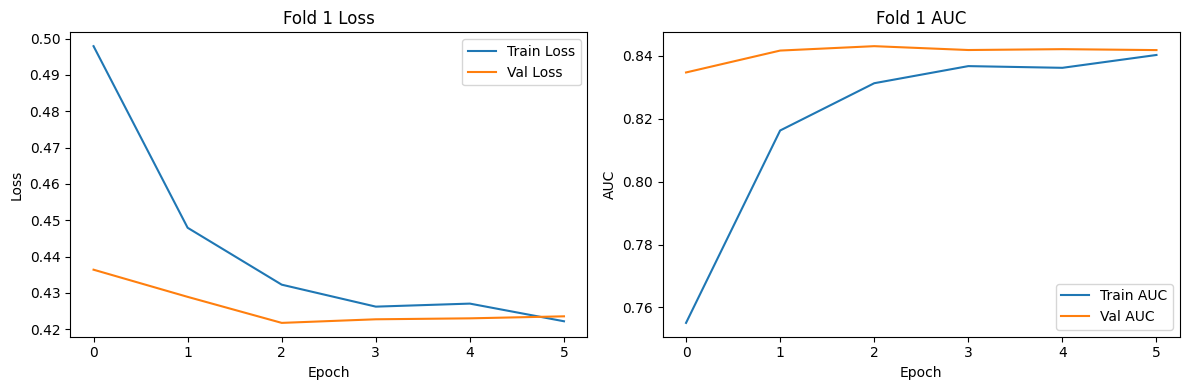

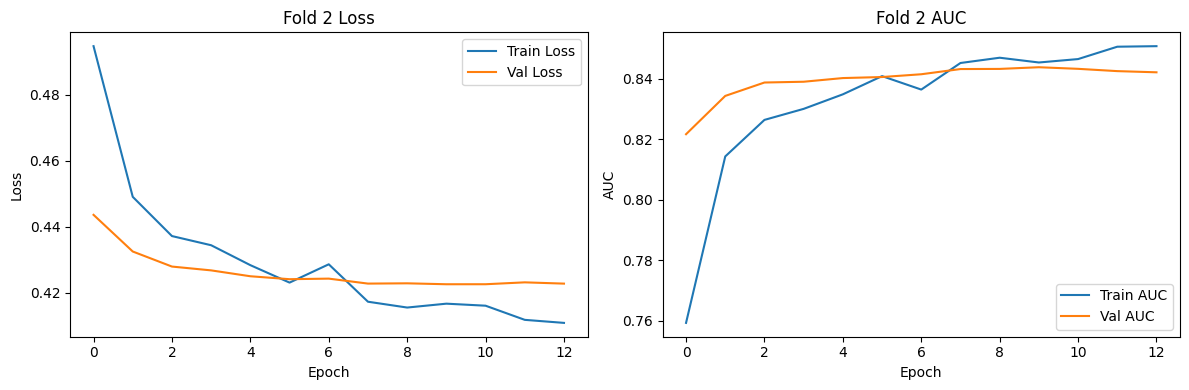

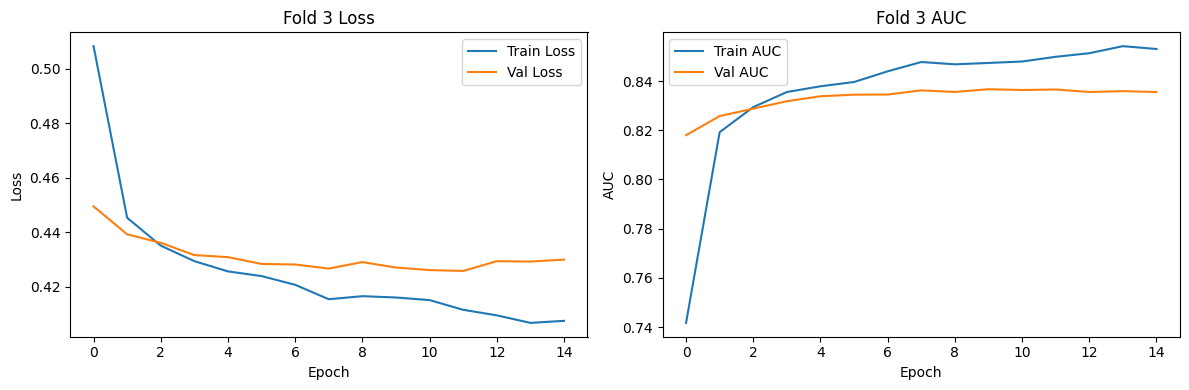

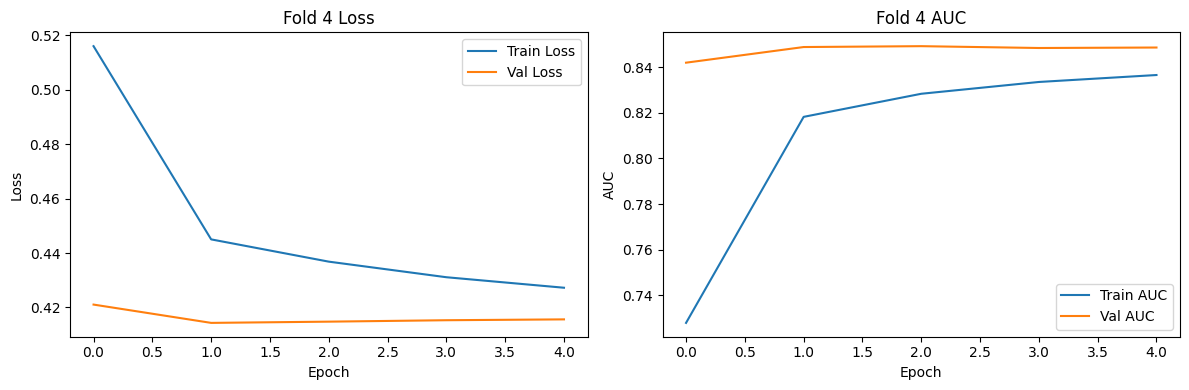

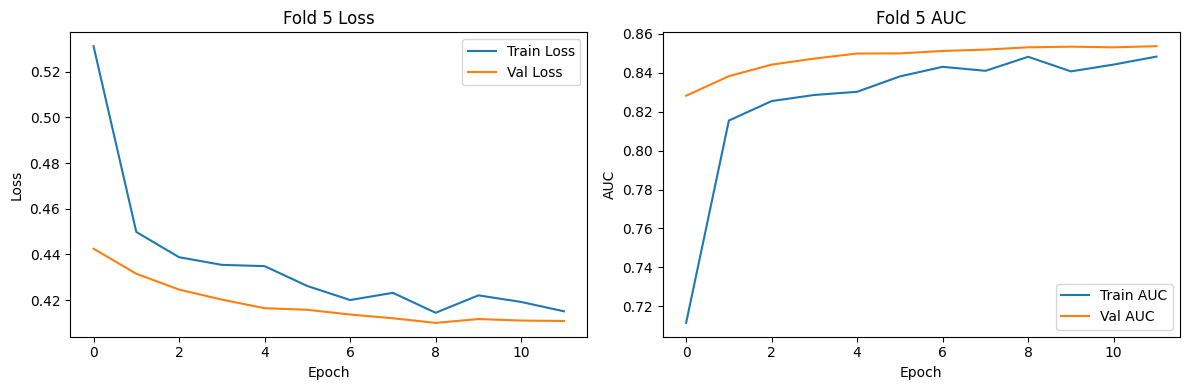

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



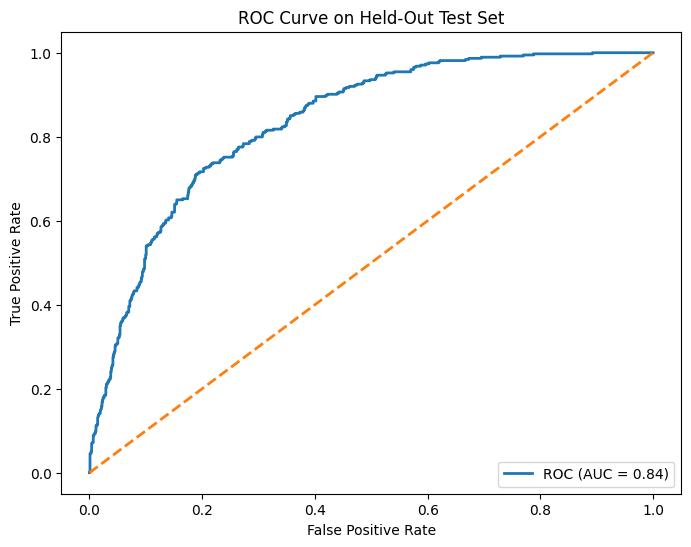

In [7]:
# 5) Now fit preprocessor on full TRAINING set & transform TEST set
preprocessor.fit(X_train)
X_test_proc = preprocessor.transform(X_test)

# pick the last fold’s model (or average predictions from all_models)
final_model = all_models[-1]

# 6) Plot each fold’s training history
for i, history in enumerate(all_histories, start=1):
    h = history.history
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(h['loss'], label='Train Loss')
    plt.plot(h['val_loss'], label='Val Loss')
    plt.title(f'Fold {i} Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(h['auc'], label='Train AUC')
    plt.plot(h['val_auc'], label='Val AUC')
    plt.title(f'Fold {i} AUC')
    plt.xlabel('Epoch'); plt.ylabel('AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 7) Final evaluation on the held-out test set
y_pred_prob    = final_model.predict(X_test_proc).ravel()
y_pred_classes = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_classes))

# 8) ROC curve on TEST
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc     = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Held-Out Test Set')
plt.legend(loc='lower right')
plt.show()